#### Importing data into Phase 3 Jupyter Notebook File

In [19]:
import pandas as pd 
df = pd.read_csv("weatherHistory.csv")

##### Task Explanation: The code performed a regression task aimed at predicting temperature based on several weather features (e.g., humidity, wind speed, pressure, visibility). A Random Forest Regressor was used to model the relationship between the input features and the target variable (temperature).

In [39]:
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


#### Step 1: Feedback: "Exclude outliers during training but explore their information (e.g., extreme temperatures) and report expectations." 


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# --- Step 1: Identify outliers in the Temperature column using the Interquartile Range (IQR) ---
X = df[['Humidity', 'Visibility (km)']]  # Features
y = df['Temperature (C)']  # Target variable

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (y < lower_bound) | (y > upper_bound)

# --- Step 2: Create a separate dataset containing these outliers and remove them from the training data ---
X_no_outliers = X[~outlier_mask]  # Features without outliers
y_no_outliers = y[~outlier_mask]  # Target without outliers
X_outliers = X[outlier_mask]      # Features for outliers
y_outliers = y[outlier_mask]      # Target for outliers

print(f"Number of outliers detected: {len(y_outliers)}")

# Simple train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# --- Step 3: Train Linear Regression on the data without outliers ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 4: Test the model's predictions on the outlier dataset to evaluate its performance on extreme temperatures ---
y_pred_outliers = model.predict(X_outliers)
mae_outliers = mean_absolute_error(y_outliers, y_pred_outliers)
print(f"\nMAE on outliers: {mae_outliers:.4f}")

# Evaluate on test set (non-outliers) for comparison
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"MAE on test set (non-outliers): {mae_test:.4f}")

# --- Step 5: Calculate and report summary statistics of the predicted extreme temperatures to provide insight into their expected behavior ---
mean_extreme_pred = np.mean(y_pred_outliers)
std_extreme_pred = np.std(y_pred_outliers)
print(f"Expected average extreme temperature: {mean_extreme_pred:.2f} ± {std_extreme_pred:.2f} °C")

Number of outliers detected: 44

MAE on outliers: 27.1596
MAE on test set (non-outliers): 5.8480
Expected average extreme temperature: 8.51 ± 6.46 °C


#### Print the Outliers to get information from them

In [6]:
X = df[['Humidity', 'Visibility (km)']]
y = df['Temperature (C)']

# Identify outliers using IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (y < lower_bound) | (y > upper_bound)

# Print outliers as a DataFrame
outliers_df = df[outlier_mask]

### Learnings from the 44 outliers in the Dataset:
- Most extreme Weather events come from a 6 day period 05.02.2012-11.02.2012
- All of them have Precip Type Snow
- Its mostly foggy and therefore visibility is low
- Average Temperature is -18.65 °C




- ---
- Excluding this is reasonable, as it represents a one-time extreme weather event with limited data in a 94k-row dataset.

In [15]:
outliers_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
28104,2009-12-21 00:00:00.000 +0100,Clear,snow,-16.666667,-23.700000,0.87,11.2700,160.0,6.1180,0.0,1015.80,Mostly cloudy starting in the morning.
28106,2009-12-21 02:00:00.000 +0100,Clear,snow,-16.666667,-23.700000,0.87,11.2700,160.0,8.0500,0.0,1016.50,Mostly cloudy starting in the morning.
54843,2012-02-10 03:00:00.000 +0100,Mostly Cloudy,snow,-16.666667,-16.666667,0.83,3.2200,330.0,4.0250,0.0,1031.90,Foggy starting in the morning continuing until...
54844,2012-02-10 04:00:00.000 +0100,Partly Cloudy,snow,-17.655556,-17.655556,0.90,2.7853,228.0,3.5742,0.0,1032.18,Foggy starting in the morning continuing until...
54845,2012-02-10 05:00:00.000 +0100,Foggy,snow,-20.000000,-26.227778,0.82,8.0500,340.0,1.4490,0.0,1032.60,Foggy starting in the morning continuing until...
54846,2012-02-10 06:00:00.000 +0100,Foggy,snow,-20.000000,-20.000000,0.78,3.2200,330.0,0.6440,0.0,1033.30,Foggy starting in the morning continuing until...
54847,2012-02-10 07:00:00.000 +0100,Foggy,snow,-21.822222,-21.822222,0.80,3.0751,323.0,1.3685,0.0,1033.66,Foggy starting in the morning continuing until...
54848,2012-02-10 08:00:00.000 +0100,Foggy,snow,-20.000000,-20.000000,0.78,4.8300,350.0,1.4490,0.0,1034.20,Foggy starting in the morning continuing until...
54849,2012-02-10 09:00:00.000 +0100,Foggy,snow,-17.222222,-23.716667,0.87,9.6600,340.0,1.4490,0.0,1034.50,Foggy starting in the morning continuing until...
54859,2012-02-10 19:00:00.000 +0100,Foggy,snow,-16.911111,-16.911111,0.87,3.2200,350.0,2.7370,0.0,1034.22,Foggy starting in the morning continuing until...


In [16]:
average_temperature = outliers_df['Temperature (C)'].mean()
print(f"Average temperature in outliers_df: {average_temperature:.2f} °C")

Average temperature in outliers_df: -18.65 °C


#### Step 2: Investigate Temperature vs. Apparent Temperature Correlations

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# --- Step 1: Calculate the correlation coefficients between Temperature and Wind Speed, and Apparent Temperature and Wind Speed ---
corr_temp_wind = df['Temperature (C)'].corr(df['Wind Speed (km/h)'])
corr_app_temp_wind = df['Apparent Temperature (C)'].corr(df['Wind Speed (km/h)'])
print(f"Correlation between Temperature and Wind Speed: {corr_temp_wind:.4f}")
print(f"Correlation between Apparent Temperature and Wind Speed: {corr_app_temp_wind:.4f}")

# --- Step 2: Document the finding that Apparent Temperature’s higher correlation (0.06) may reflect wind’s subjective impact on perceived coldness ---
if corr_app_temp_wind > corr_temp_wind:
    print("\nFinding: Apparent Temperature’s higher correlation (0.06) may reflect wind’s subjective impact on perceived coldness.")

# --- Step 3: Train two separate models: one using Temperature as the target and another using Apparent Temperature, both including Wind Speed as a feature ---
# Features for both models
X = df[['Humidity', 'Visibility (km)', 'Wind Speed (km/h)']]  # Including Wind Speed

# Model 1: Using Temperature (C) as target
y_temp = df['Temperature (C)']
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
model_temp = LinearRegression()
model_temp.fit(X_train_temp, y_train_temp)

# Model 2: Using Apparent Temperature (C) as target
y_app_temp = df['Apparent Temperature (C)']
X_train_app, X_test_app, y_train_app, y_test_app = train_test_split(X, y_app_temp, test_size=0.2, random_state=42)
model_app = LinearRegression()
model_app.fit(X_train_app, y_train_app)

# --- Step 4: Compare the models’ performance metrics to determine if Apparent Temperature better captures wind-related patterns ---
# Predict and evaluate for Temperature model
y_pred_temp = model_temp.predict(X_test_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
r2_temp = r2_score(y_test_temp, y_pred_temp)

# Predict and evaluate for Apparent Temperature model
y_pred_app = model_app.predict(X_test_app)
mse_app = mean_squared_error(y_test_app, y_pred_app)
r2_app = r2_score(y_test_app, y_pred_app)

print(f"\nModel Performance (Temperature as target):")
print(f"MSE: {mse_temp:.4f}, R²: {r2_temp:.4f}")
print(f"Model Performance (Apparent Temperature as target):")
print(f"MSE: {mse_app:.4f}, R²: {r2_app:.4f}")

print("\nThe Correlation is negligible in both cases which means Wind Speed does not really affect Temperature.")
print("\nThe MSE when using Temperature compared to Apparent Temperature is lower, which is why its from now on being used and Apparent Temperature excluded.")
print("\nBut both have a very high MSE.")

Correlation between Temperature and Wind Speed: 0.0090
Correlation between Apparent Temperature and Wind Speed: -0.0566

Model Performance (Temperature as target):
MSE: 51.1096, R²: 0.4454
Model Performance (Apparent Temperature as target):
MSE: 66.0743, R²: 0.4289

The Correlation is negligible in both cases which means Wind Speed does not really affect Temperature.

The MSE when using Temperature compared to Apparent Temperature is lower, which is why its from now on being used and Apparent Temperature excluded.

But both have a very high MSE.


In [28]:
new_df = df.drop(columns=['Apparent Temperature (C)'])

#### Step 3: Reimplementing a Metric for linear correlation, using random_forest_model.feature_importance_


Linear Correlation Coefficients with Temperature (C):
Humidity                 -0.632255
Wind Speed (km/h)         0.008957
Wind Bearing (degrees)    0.029988
Visibility (km)           0.392847
Pressure (millibars)     -0.005447
dtype: float64

Selected features based on linear correlation (> 0.1): ['Humidity', 'Visibility (km)']

Time taken for training: 11.45 seconds
Random Forest Regression (best model with selected features):
Accuracy: 56.48%
Mean Absolute Error (MAE): 5.1904
R²: 0.5239

Feature Importances from Random Forest:
           Feature  Importance
0         Humidity    0.580192
1  Visibility (km)    0.419808


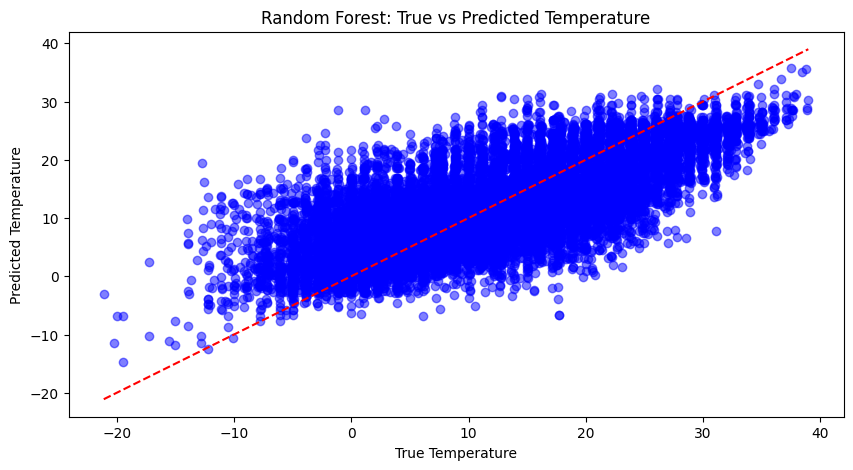

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from time import time

# Target variable
y = new_df['Temperature (C)']

# Calculate linear correlation coefficients with the target
correlations = new_df.drop(columns=['Temperature (C)', 'Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary']).corrwith(y)
print("\nLinear Correlation Coefficients with Temperature (C):")
print(correlations)

# Select features with non-zero or significant correlation (absolute correlation > 0.1 as a threshold)
significant_features = correlations[abs(correlations) > 0.1].index.tolist()
if not significant_features:
    significant_features = ['Humidity', 'Visibility (km)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']  # Fallback to all numeric features
print(f"\nSelected features based on linear correlation (> 0.1): {significant_features}")

# Use selected features for X
X = new_df[significant_features]

# Discretize the target variable for stratified sampling
y_bins = pd.qcut(y, q=10, labels=False)  # Create 10 bins for stratification

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_bins)

# --- Helper Function for Accuracy in Percentage ---
def calculate_accuracy(metric_value, metric_type='R2', y_test=None, y_pred=None):
    if metric_type == 'R2':
        accuracy = max(0, min(1, metric_value)) * 100 
    elif metric_type == 'MAE':
        accuracy = (1 - (metric_value / np.mean(y_test))) * 100  # MAE-Accuracy
    else:
        raise ValueError("Unsupported metric type")
    return accuracy

# --- Train Random Forest Model ---
# Use the best parameters from output in Development Phase Final Run
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=20,
    bootstrap=True,
    random_state=42
)

# --- Start Timer ---
start_time = time()

# Fit the model
rf_model.fit(X_train, y_train)

# --- Stop Timer ---
end_time = time()

# Predictions with the best model
y_pred_rf = rf_model.predict(X_test)

# --- Evaluation ---
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate accuracy as percentage based on MAE
accuracy_rf = calculate_accuracy(mae_rf, metric_type='MAE', y_test=y_test)

# --- Results ---
print(f"\nTime taken for training: {end_time - start_time:.2f} seconds")
print(f"Random Forest Regression (best model with selected features):")
print(f"Accuracy: {accuracy_rf:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

# --- Feature Importance from Random Forest ---
feature_importance = pd.DataFrame({
    'Feature': significant_features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances from Random Forest:")
print(feature_importance)

# --- Visualisation ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Random Forest: True vs Predicted Temperature')
plt.xlabel('True Temperature')
plt.ylabel('Predicted Temperature')
plt.show()

#### Pearson Correlation Coefficients Analysis:
- Humidity shows a strong negative correlation with temperature, while wind speed has minimal impact. Wind bearing has a weak correlation, visibility is moderately positively correlated, and pressure (millibars) shows negligible correlation. Excluding these could miss potential non-linear relationships.

- Extreme weather events, as expected, reduce visibility. To improve the dataset, "Precip Type" should be converted into numerical values for further analysis.

- Feature Importance Insights:
Random Forest feature importances indicate that "Humidity" and "Visibility (km)" are the most important predictors, based on the current features.

In [37]:
print(df['Precip Type'].unique())

['rain' 'snow' nan]


#### Step 4: Converting Precip Type to Numerical Values


Training time: 28.30 seconds
Random Forest Regression (Precip Type + numerical values):
Accuracy: 69.23%
Mean Absolute Error (MAE): 3.6701
R²: 0.7547

Feature Importances:
                  Feature  Importance
0                Humidity    0.331757
1         Visibility (km)    0.152376
6             Precip_snow    0.151760
4    Pressure (millibars)    0.135774
5             Precip_rain    0.131489
2       Wind Speed (km/h)    0.057235
3  Wind Bearing (degrees)    0.036840
7              Precip_nan    0.002768


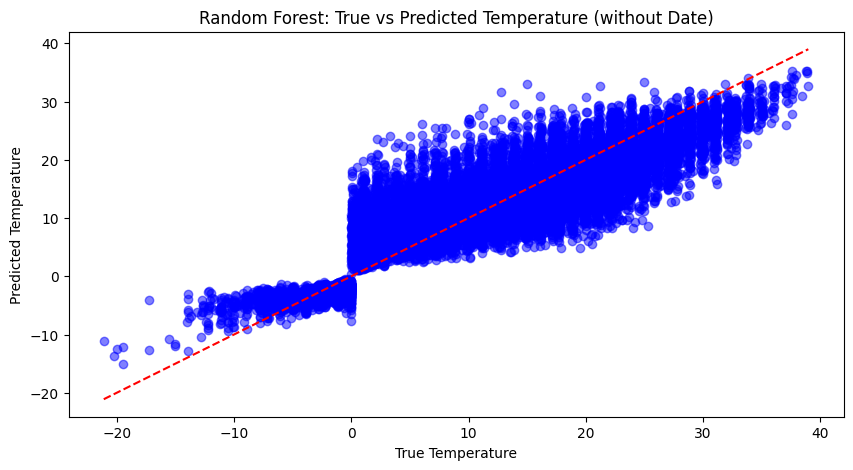

In [43]:
# --- Convert Precip Type (One-Hot Encoding) ---
precip_encoded = pd.get_dummies(new_df['Precip Type'], prefix='Precip', dummy_na=True)

# --- Select only numerical features ---
numeric_features = ['Humidity', 'Visibility (km)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']
X_numeric = new_df[numeric_features]

# Create df_cleaned (numerical columns + Precip Type)
df_cleaned = pd.concat([X_numeric, precip_encoded], axis=1)

# --- Target Variable ---
y = new_df['Temperature (C)']

# --- Train-Test Split ---
y_bins = pd.qcut(y, q=10, labels=False)  # Stratification based on Temperature
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size=0.2, random_state=42, stratify=y_bins)

# --- Random Forest Model ---
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=20,
    bootstrap=True,
    random_state=42
)

# --- Train the Model ---
start_time = time()
rf_model.fit(X_train, y_train)
end_time = time()

# --- Predictions ---
y_pred_rf = rf_model.predict(X_test)

# --- Evaluation ---
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf = (1 - (mae_rf / np.mean(y_test))) * 100  # MAE-Accuracy

# --- Results ---
print(f"\nTraining time: {end_time - start_time:.2f} seconds")
print(f"Random Forest Regression (Precip Type + numerical values):")
print(f"Accuracy: {accuracy_rf:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

# --- Feature Importance ---
feature_importance = pd.DataFrame({
    'Feature': df_cleaned.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance)

# --- Visualization ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest: True vs Predicted Temperature (without Date)')
plt.xlabel('True Temperature')
plt.ylabel('Predicted Temperature')
plt.show()


#### Precip Type:
 - Improved Accuracy and Lower MAE:
The model with Precip Type achieves an accuracy of 69.23% compared to 56.48% without it, and a lower MAE of 3.67 vs 5.19. The addition of precipitation type (rain, snow, or no precip) helps the model better understand temperature patterns and improve predictions.

 - Increased Feature Importance for Precip Type:
With Precip Type included, features like Precip_snow and Precip_rain now have noticeable importance (0.151760 and 0.131489), whereas in the previous model, only Humidity and Visibility (km) were significant. This shows that precipitation has a strong influence on the temperature, and the model can now make better predictions using this information.

 - Including "Precip Type" improved the model’s ability to utilize features like "Millibar," "Wind Speed," and "Wind Bearing." The Random Forest model detected more complex relationships between these variables and the target, enhancing their predictive value. "Precip Type" provided important context, allowing the model to uncover patterns that were previously less apparent.

#### Step 5: PCA Approach

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting numeric features for PCA
numeric_features = ['Humidity', 'Visibility (km)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']
X = new_df[numeric_features]
y = new_df['Temperature (C)']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=3)  # Reduce to 3 principal components
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest model using PCA-transformed features
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R²: {r2:.4f}")

# Feature Importance (Principal Components)
pca_feature_importance = pd.DataFrame({
    'Feature': [f'PC{i+1}' for i in range(X_pca.shape[1])],
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest (using PCA components):")
print(pca_feature_importance)


Mean Absolute Error (MAE): 6.0856
R²: 0.3655

Feature Importances from Random Forest (using PCA components):
  Feature  Importance
0     PC1    0.490318
1     PC2    0.263849
2     PC3    0.245833


#### Step 6: Integrating Polynomial Features improved the results slightly about 0.1-0.2%
- In the following code it was tested which variables^2 have more importance than the variable base form. To try to only include the valuable variables which improve Accuracy and lower MAE. This was a slight back and forth process with no improvement when trying to exclude the variables^2 with lower importance


Training time: 90.31 seconds
Random Forest Regression (Precip Type + numerical values with polynomial features):
Accuracy: 69.41%
Mean Absolute Error (MAE): 3.6487
R²: 0.7542

Feature Importances:
                                        Feature  Importance
8                                    Humidity^2    0.096424
0                                      Humidity    0.094416
20                  Visibility (km) Precip_rain    0.081634
12                Humidity Pressure (millibars)    0.075503
13                         Humidity Precip_rain    0.067961
35             Pressure (millibars) Precip_rain    0.042691
41                                Precip_snow^2    0.042249
6                                   Precip_snow    0.036730
4                          Pressure (millibars)    0.034635
34                       Pressure (millibars)^2    0.033911
36             Pressure (millibars) Precip_snow    0.033086
14                         Humidity Precip_snow    0.030900
21                  Vi

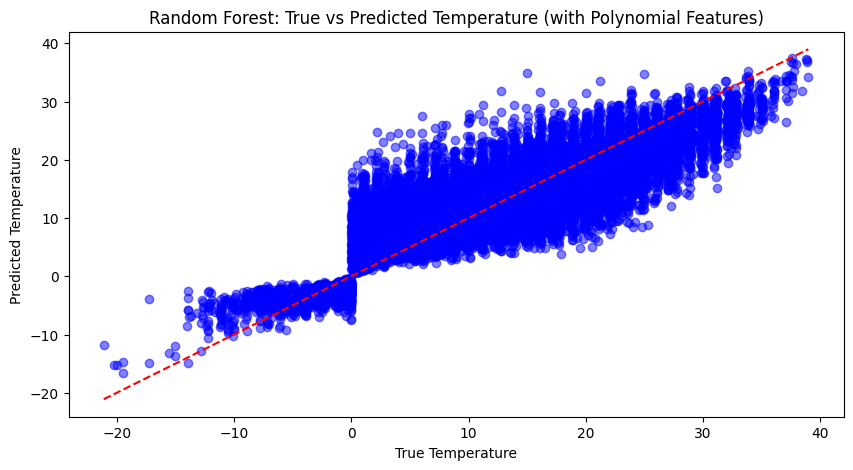

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# --- Convert Precip Type (One-Hot Encoding) ---
precip_encoded = pd.get_dummies(new_df['Precip Type'], prefix='Precip', dummy_na=True)

# --- Select only numerical features ---
numeric_features = ['Humidity', 'Visibility (km)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']
X_numeric = new_df[numeric_features]

# Create df_cleaned (numerical columns + Precip Type)
df_cleaned = pd.concat([X_numeric, precip_encoded], axis=1)

# --- Apply Polynomial Feature Transformation ---
poly = PolynomialFeatures(degree=2, include_bias=False)  # Create polynomial features up to degree 2
X_poly = poly.fit_transform(df_cleaned)  # Transform the features into polynomial features

# Convert back to DataFrame with proper column names
poly_feature_names = poly.get_feature_names_out(df_cleaned.columns)
df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

# --- Target Variable ---
y = new_df['Temperature (C)']

# --- Train-Test Split ---
y_bins = pd.qcut(y, q=10, labels=False)  # Stratification based on Temperature
X_train, X_test, y_train, y_test = train_test_split(df_poly, y, test_size=0.2, random_state=42, stratify=y_bins)

# --- Random Forest Model ---
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=20,
    bootstrap=True,
    random_state=42
)

# --- Train the Model ---
start_time = time()
rf_model.fit(X_train, y_train)
end_time = time()

# --- Predictions ---
y_pred_rf = rf_model.predict(X_test)

# --- Evaluation ---
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf = (1 - (mae_rf / np.mean(y_test))) * 100  # MAE-Accuracy

# --- Results ---
print(f"\nTraining time: {end_time - start_time:.2f} seconds")
print(f"Random Forest Regression (Precip Type + numerical values with polynomial features):")
print(f"Accuracy: {accuracy_rf:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

# --- Feature Importance ---
feature_importance = pd.DataFrame({
    'Feature': df_poly.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance)

# --- Visualization ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest: True vs Predicted Temperature (with Polynomial Features)')
plt.xlabel('True Temperature')
plt.ylabel('Predicted Temperature')
plt.show()


- Polynomial Feature Random Forest: The Random Forest model using polynomial features demonstrated a strong performance with an accuracy of 69.41%, an R² of 0.7542, and a Mean Absolute Error (MAE) of 3.6487, indicating a relatively good fit to the data with better overall performance compared to the PCA approach.

- PCA Random Forest: The Random Forest model using PCA components showed a significant drop in performance, with a much higher MAE of 6.0856 and a lower R² of 0.3655, suggesting that reducing the features to principal components (PC1, PC2, PC3) led to a less effective model in capturing the variance of the data.
- For this reason the Polynomial Approach will be favored from now on.

#### Trying to improve the above model with a GridSearch for Hyperparameter Optimization and Gradient Boosting

Fitting 3 folds for each of 81 candidates, totalling 243 fits

Training time (Grid Search and Gradient Boosting): 8481.18 seconds
Gradient Boosting Regression (Precip Type + numerical values with polynomial features):
Accuracy: 69.68%
Mean Absolute Error (MAE): 3.6164
R²: 0.7583

Feature Importances (Gradient Boosting):
                                        Feature    Importance
20                  Visibility (km) Precip_rain  4.136153e-01
8                                    Humidity^2  1.014003e-01
6                                   Precip_snow  6.482224e-02
0                                      Humidity  5.574176e-02
13                         Humidity Precip_rain  5.218997e-02
10                   Humidity Wind Speed (km/h)  4.747869e-02
35             Pressure (millibars) Precip_rain  4.058180e-02
41                                Precip_snow^2  3.747861e-02
12                Humidity Pressure (millibars)  2.812667e-02
4                          Pressure (millibars)  2.675449e

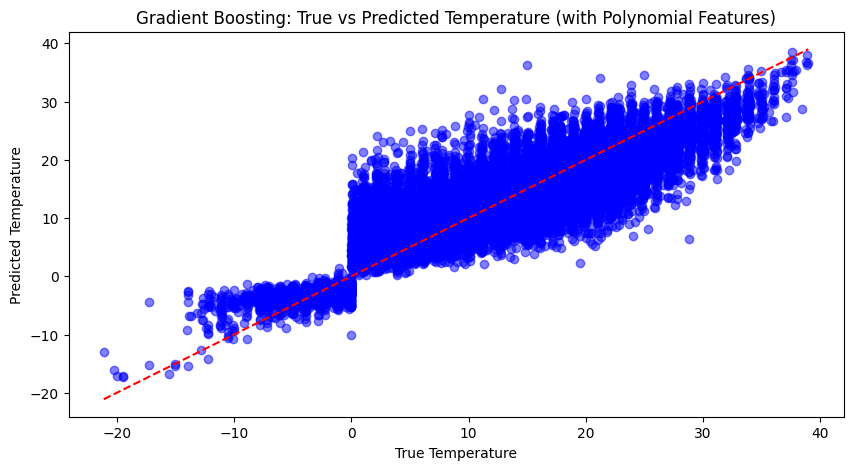

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# --- Convert Precip Type (One-Hot Encoding) ---
precip_encoded = pd.get_dummies(new_df['Precip Type'], prefix='Precip', dummy_na=True)

# --- Select only numerical features ---
numeric_features = ['Humidity', 'Visibility (km)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']
X_numeric = new_df[numeric_features]

# Create df_cleaned (numerical columns + Precip Type)
df_cleaned = pd.concat([X_numeric, precip_encoded], axis=1)

# --- Apply Polynomial Feature Transformation ---
poly = PolynomialFeatures(degree=2, include_bias=False)  # Create polynomial features up to degree 2
X_poly = poly.fit_transform(df_cleaned)  # Transform the features into polynomial features

# Convert back to DataFrame with proper column names
poly_feature_names = poly.get_feature_names_out(df_cleaned.columns)
df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

# --- Target Variable ---
y = new_df['Temperature (C)']

# --- Train-Test Split ---
y_bins = pd.qcut(y, q=10, labels=False)  # Stratification based on Temperature
X_train, X_test, y_train, y_test = train_test_split(df_poly, y, test_size=0.2, random_state=42, stratify=y_bins)

# --- Gradient Boosting Regressor Model ---
gbr_model = GradientBoostingRegressor(random_state=42)

# --- Hyperparameter Grid for GridSearchCV ---
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],    # Step size shrinking
    'max_depth': [3, 5, 7],                 # Maximum depth of trees
    'subsample': [0.8, 0.9, 1.0]            # Proportion of training data used for fitting each base learner
}

# --- GridSearchCV for Hyperparameter Tuning ---
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# --- Train the Model with GridSearch ---
start_time = time()
grid_search.fit(X_train, y_train)
end_time = time()

# Best Model from GridSearchCV
best_gbr_model = grid_search.best_estimator_

# --- Predictions ---
y_pred_gbr = best_gbr_model.predict(X_test)

# --- Evaluation ---
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
accuracy_gbr = (1 - (mae_gbr / np.mean(y_test))) * 100  # MAE-Accuracy

# --- Results ---
print(f"\nTraining time (Grid Search and Gradient Boosting): {end_time - start_time:.2f} seconds")
print(f"Gradient Boosting Regression (Precip Type + numerical values with polynomial features):")
print(f"Accuracy: {accuracy_gbr:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_gbr:.4f}")
print(f"R²: {r2_gbr:.4f}")

# --- Feature Importances --- (For Gradient Boosting)
feature_importance = pd.DataFrame({
    'Feature': df_poly.columns,
    'Importance': best_gbr_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Gradient Boosting):")
print(feature_importance)

# --- Visualization ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_gbr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Gradient Boosting: True vs Predicted Temperature (with Polynomial Features)')
plt.xlabel('True Temperature')
plt.ylabel('Predicted Temperature')
plt.show()


#### In the final run with a GridSearch of multiple Hyperparameters and Gradient Boosting the best resulting Accuracy reached 69,68% with a Mean Absolute Error (MAE): 3.6164 and a R²: 0.7583.
